<a href="https://colab.research.google.com/github/Nazmus-Sanib/Modeling_program_with_python/blob/main/Bathymetry_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!pip install utm
!pip install geotable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=4dd5d024b6e63fb284956926a51e36a4345a7f30b9ba55a2ed64c79056d16450
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

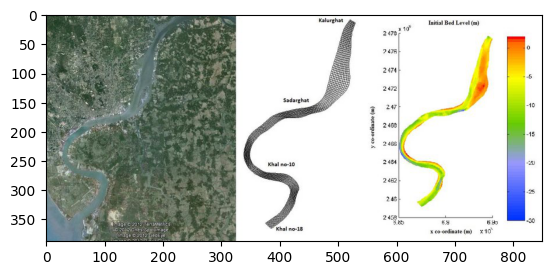

In [ ]:
path = "drive/MyDrive/seismic_noise/lower_karnaphuli.jpg"

im  = plt.imread(path)

plt.imshow(im)


north = (22.39488888888889, 91.89095555555556)
south = (22.22583333333333, 91.79318055555555)

north_utm = (385838.04417115444, 2476957.6627725437)   # Easting, northing
south_utm = (376840.92716210004, 2458309.7489182623)


east_range = [south_utm[0], north_utm[0]]
north_range = [south_utm[1], north_utm[1]]

In [ ]:
326-39

287

In [ ]:
"""import cv2

bigger = cv2.resize(im[39:326, 605:605+162, 0], (162*15, 287*15))

plt.imshow(bigger)

bigger"""

'import cv2\n\nbigger = cv2.resize(im[39:326, 605:605+162, 0], (162*15, 287*15))\n\nplt.imshow(bigger)\n\nbigger'

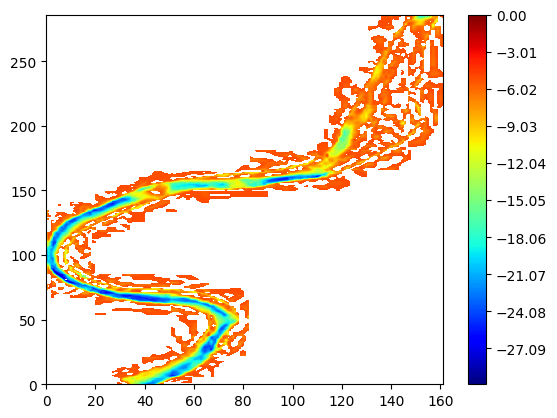

In [ ]:
m1 = im[39:326, 605:605+162, 0]

io1 = np.zeros(m1.shape)+np.nan
for i in range(m1.shape[0]):
  for j in range(m1.shape[1]):

    if m1[i,j]!=255:  #and j not in np.arange(0,10)
        io1[i,j] = m1[i,j]
    elif m1[i,j]!=255 and i not in list(np.arange(0,145))+list(np.arange(220,287)):
        io1[i,j] = m1[i,j]
    elif m1[i,j]!=255 and j not in np.arange(0,30):
        io1[i,j] = m1[i,j]
    elif m1[i,j]!=255 and i not in np.arange(277,287):
        io1[i,j] = m1[i,j]

io1[0:130, 0:37] = np.zeros((130-0, 37-0))+np.nan

io1[130:145, 0:20] = np.zeros((15, 20))+np.nan

io1[145:147, 0:10] = np.zeros((2, 10))+np.nan

io1[147:150, 0:5] = np.zeros((3, 5))+np.nan

io1[220:277, 0:20] = np.zeros((277-220, 20-0))+np.nan

io1[277:287, 0:25,] = np.zeros((287-277, 25-0))+np.nan



m1 = io1.copy()

n = 300
val = [str(i) for i in np.linspace(-31, -5, n)[::-1]]

rm1 = np.linspace(np.nanmin(m1[::-1, :]), np.nanmax(m1[::-1, :])+1, n)[::-1]

range_ = [[rm1[i-1], rm1[i]] for i in np.arange(1,len(rm1))]


io4 = np.zeros(m1.shape)+np.nan

for i in np.arange(m1.shape[0]):
  for j in np.arange(m1.shape[1]):
    for k in np.arange(len(range_)):
      if range_[k][1] < m1[i,j] <range_[k][0]:
        io4[i,j] = val[k]

data = io4[::-1, :]

imm = plt.contourf(data, cmap = 'jet', levels = np.linspace(0,-30,n)[::-1])
plt.colorbar(imm)


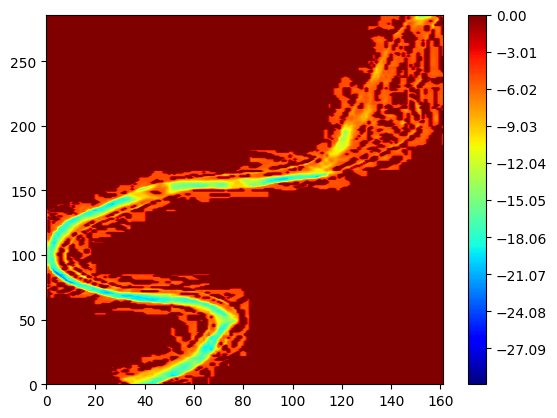

In [ ]:
m1 = im[39:326, 605:605+162, 0]

io1 = np.zeros(m1.shape)
for i in range(m1.shape[0]):
  for j in range(m1.shape[1]):

    if m1[i,j]!=255:  #and j not in np.arange(0,10)
        io1[i,j] = m1[i,j]


io1[0:130, 0:37] = np.zeros((130-0, 37-0))

io1[130:145, 0:20] = np.zeros((15, 20))

io1[145:147, 0:10] = np.zeros((2, 10))

io1[147:150, 0:5] = np.zeros((3, 5))

io1[220:277, 0:20] = np.zeros((277-220, 20-0))

io1[277:287, 0:25,] = np.zeros((287-277, 25-0))



m1 = io1.copy()

n = 300
val = [str(i) for i in np.linspace(-31, -5, n)[::-1]]

rm1 = np.linspace(np.nanmin(m1[::-1, :]), np.nanmax(m1[::-1, :])+1, n)[::-1]

range_ = [[rm1[i-1], rm1[i]] for i in np.arange(1,len(rm1))]


io4 = np.zeros(m1.shape)

for i in np.arange(m1.shape[0]):
  for j in np.arange(m1.shape[1]):
    for k in np.arange(len(range_)):
      if range_[k][1] < m1[i,j] <range_[k][0]:
        io4[i,j] = val[k]

data = io4[::-1, :]

imm = plt.contourf(data, cmap = 'jet', levels = np.linspace(0,-30,n)[::-1])
plt.colorbar(imm)


In [ ]:
shp = data.shape

e = east_range
n = north_range

easting_ = np.linspace(e[0], e[1], shp[1])
northing_ = np.linspace(n[0], n[1], shp[0])


len(northing_), len(easting_)

(287, 162)

In [ ]:
!pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 88.7 MB/s eta 0:00:00


In [ ]:
import netCDF4 as nc

import numpy as np

fn = "drive/MyDrive/seismic_noise/bathymetry_land_low_resolution_zeros.nc"
ds = nc.Dataset(fn, 'w', format='NETCDF4')


northing = ds.createDimension('northing', shp[0])
easting = ds.createDimension('easting', shp[1])


ns = ds.createVariable('northing', 'f4', ('northing',))
es = ds.createVariable('easting', 'f4', ('easting',))
value = ds.createVariable('bathymetry', 'f4', ('northing', 'easting',))
value.units = 'm'

ns[:] = northing_
es[:] = easting_

print('var size before adding data', value.shape)

value[:, :] = data


ds.close()

var size before adding data (287, 162)


In [ ]:
import xarray as xr

fn = "drive/MyDrive/seismic_noise/bathymetry_land_low_resolution_zeros.nc"
dt = xr.open_mfdataset(fn)

dt

<xarray.Dataset>
Dimensions:     (northing: 287, easting: 162)
Coordinates:
  * northing    (northing) float32 2.458e+06 2.458e+06 ... 2.477e+06 2.477e+06
  * easting     (easting) float32 3.768e+05 3.769e+05 ... 3.858e+05 3.858e+05
Data variables:
    bathymetry  (northing, easting) float32 dask.array<chunksize=(287, 162), meta=np.ndarray>